# Análisis de Covid en CABA
Trabajaremos con el dataset con los casos y muertes de COVID de la Ciudad Autónoma de Buenos Aires (CABA)

El dataset lo podes descargar aquí:

https://data.buenosaires.gob.ar/dataset/casos-covid-19

La información es actualizada diariamente.

__1) Descargamos las librerías necesarias__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/casos-covid-19/casos_covid19.csv') #Dataset CRUDO

C:\Users\Samsung\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
raw_data.head()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,1033876,07JUN2020:00:00:00.000000,06JUN2020:00:00:00.000000,08JUN2020:00:00:00.000000,CABA,FLORES,7.0,masculino,11.0,confirmado,NaN,NaN,18JUN2020:00:00:00.000000,Comunitario
1,1034619,07JUN2020:00:00:00.000000,07JUN2020:00:00:00.000000,07JUN2020:00:00:00.000000,CABA,BARRACAS,4.0,masculino,51.0,confirmado,NaN,NaN,18JUN2020:00:00:00.000000,Contacto
2,1034978,07JUN2020:00:00:00.000000,07JUN2020:00:00:00.000000,07JUN2020:00:00:00.000000,CABA,FLORES,7.0,femenino,61.0,confirmado,NaN,NaN,18JUN2020:00:00:00.000000,Contacto
3,1035041,07JUN2020:00:00:00.000000,07JUN2020:00:00:00.000000,07JUN2020:00:00:00.000000,CABA,FLORES,7.0,masculino,30.0,confirmado,NaN,NaN,18JUN2020:00:00:00.000000,Contacto
4,1035090,07JUN2020:00:00:00.000000,07JUN2020:00:00:00.000000,07JUN2020:00:00:00.000000,CABA,BARRACAS,4.0,masculino,27.0,confirmado,NaN,NaN,18JUN2020:00:00:00.000000,Contacto


In [4]:
raw_data.tail()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
3393354,7935065,20FEB2021:00:00:00.000000,19FEB2021:00:00:00.000000,19FEB2021:00:00:00.000000,Buenos Aires,NaN,NaN,femenino,63.0,descartado,NaN,NaN,NaN,NaN
3393355,7935066,20FEB2021:00:00:00.000000,20FEB2021:00:00:00.000000,20FEB2021:00:00:00.000000,CABA,VILLA DEL PARQUE,11.0,masculino,22.0,descartado,NaN,NaN,NaN,NaN
3393356,7935067,20FEB2021:00:00:00.000000,20FEB2021:00:00:00.000000,20FEB2021:00:00:00.000000,CABA,VERSALLES,10.0,masculino,35.0,descartado,NaN,NaN,NaN,NaN
3393357,7935068,20FEB2021:00:00:00.000000,19FEB2021:00:00:00.000000,19FEB2021:00:00:00.000000,CABA,VILLA CRESPO,15.0,masculino,71.0,descartado,NaN,NaN,NaN,NaN
3393358,7935069,20FEB2021:00:00:00.000000,20FEB2021:00:00:00.000000,20FEB2021:00:00:00.000000,Mendoza,NaN,NaN,femenino,30.0,descartado,NaN,NaN,NaN,NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3393359 entries, 0 to 3393358
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   numero_de_caso       int64  
 1   fecha_apertura_snvs  object 
 2   fecha_toma_muestra   object 
 3   fecha_clasificacion  object 
 4   provincia            object 
 5   barrio               object 
 6   comuna               float64
 7   genero               object 
 8   edad                 float64
 9   clasificacion        object 
 10  fecha_fallecimiento  object 
 11  fallecido            object 
 12  fecha_alta           object 
 13  tipo_contagio        object 
dtypes: float64(2), int64(1), object(11)
memory usage: 362.4+ MB


In [6]:
raw_data.columns

Index(['numero_de_caso', 'fecha_apertura_snvs', 'fecha_toma_muestra',
       'fecha_clasificacion', 'provincia', 'barrio', 'comuna', 'genero',
       'edad', 'clasificacion', 'fecha_fallecimiento', 'fallecido',
       'fecha_alta', 'tipo_contagio'],
      dtype='object')

__- Queremos averiguar los valores relacionados con las columnas 'clasificacion' y 'tipo_contagio'__

In [7]:
raw_data['clasificacion'].unique()

array(['confirmado', 'descartado', 'sospechoso'], dtype=object)

In [8]:
raw_data['tipo_contagio'].unique()

array(['Comunitario', 'Contacto', nan, 'En Investigación',
       'Trabajador de la Salud', 'Importado'], dtype=object)

 __3) Chequeamos los NaN values__

In [9]:
raw_data.count()

numero_de_caso         3393359
fecha_apertura_snvs    3393359
fecha_toma_muestra     3389361
fecha_clasificacion    3393359
provincia              3378657
barrio                 1861247
comuna                 1861247
genero                 3393359
edad                   3392710
clasificacion          3393359
fecha_fallecimiento      18666
fallecido                18666
fecha_alta              105402
tipo_contagio           866993
dtype: int64

In [10]:
raw_data.isna().any()

numero_de_caso         False
fecha_apertura_snvs    False
fecha_toma_muestra      True
fecha_clasificacion    False
provincia               True
barrio                  True
comuna                  True
genero                 False
edad                    True
clasificacion          False
fecha_fallecimiento     True
fallecido               True
fecha_alta              True
tipo_contagio           True
dtype: bool

In [11]:
raw_data.isna().sum() #suma de cada NaN por columna

numero_de_caso               0
fecha_apertura_snvs          0
fecha_toma_muestra        3998
fecha_clasificacion          0
provincia                14702
barrio                 1532112
comuna                 1532112
genero                       0
edad                       649
clasificacion                0
fecha_fallecimiento    3374693
fallecido              3374693
fecha_alta             3287957
tipo_contagio          2526366
dtype: int64

__4) Descartamos algunas columnas irrelevantes que no utilizaremos__


Descartamos por ejemplo las columnas 'fecha_apertura_snvs' y 'fecha_toma_muestra' ya que solo nos interesa 'fecha_clasificacion'


In [12]:
working_data = raw_data.drop(['fecha_apertura_snvs',
                              'fecha_toma_muestra',
                              'fecha_alta'], axis = 1).copy() #DATASET CON EL QUE TRABAJAREMOS PRIMEROS FILTROS (DROP COLUMNS Y FECHAS CONVERTIDAS EN DATEIME)
working_data.head()

,numero_de_caso,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,tipo_contagio
0,1033876,08JUN2020:00:00:00.000000,CABA,FLORES,7.0,masculino,11.0,confirmado,NaN,NaN,Comunitario
1,1034619,07JUN2020:00:00:00.000000,CABA,BARRACAS,4.0,masculino,51.0,confirmado,NaN,NaN,Contacto
2,1034978,07JUN2020:00:00:00.000000,CABA,FLORES,7.0,femenino,61.0,confirmado,NaN,NaN,Contacto
3,1035041,07JUN2020:00:00:00.000000,CABA,FLORES,7.0,masculino,30.0,confirmado,NaN,NaN,Contacto
4,1035090,07JUN2020:00:00:00.000000,CABA,BARRACAS,4.0,masculino,27.0,confirmado,NaN,NaN,Contacto


__5) Chequeamos si las rows contienen duplicados__


In [13]:
duplicate_rows_cases = working_data[working_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_cases.shape)

number of duplicate rows:  (0, 11)


Afortunadamente no tenemos ningun duplicado!

__- Podemos pedir información acerca de un solo row__

In [14]:
working_data.loc[457] #random row

numero_de_caso                            903220
fecha_clasificacion    11MAY2020:00:00:00.000000
provincia                                   CABA
barrio                                    RETIRO
comuna                                       1.0
genero                                 masculino
edad                                        28.0
clasificacion                         confirmado
fecha_fallecimiento                          NaN
fallecido                                    NaN
tipo_contagio                   En Investigación
Name: 457, dtype: object

__6) Convertimos la col 'fecha_clasificacion' en un datetime__

In [15]:
working_data['fecha_clasificacion'] = pd.to_datetime(working_data['fecha_clasificacion'],
                                                     format='%d%b%Y:%H:%M:%S.%f')
working_data['fecha_fallecimiento'] = pd.to_datetime(working_data['fecha_fallecimiento'],
                                                     format='%d%b%Y:%H:%M:%S.%f')
working_data.sort_values('fecha_clasificacion') #sort by date

,numero_de_caso,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,tipo_contagio
3070732,20521826,1961-01-21,Buenos Aires,NaN,NaN,masculino,60.0,descartado,NaT,NaN,NaN
1426527,1164212,1974-11-09,Buenos Aires,NaN,NaN,masculino,46.0,descartado,NaT,NaN,NaN
2601781,5733968,2002-12-27,CABA,SAN TELMO,1.0,femenino,63.0,descartado,NaT,NaN,NaN
3092626,1525260,2018-08-28,CABA,BALVANERA,3.0,masculino,48.0,descartado,NaT,NaN,NaN
1423323,1004366,2019-05-30,CABA,PALERMO,14.0,masculino,27.0,descartado,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2456196,21679569,2021-10-16,Buenos Aires,NaN,NaN,femenino,23.0,descartado,NaT,NaN,NaN
2456967,21529831,2021-10-16,Buenos Aires,NaN,NaN,femenino,46.0,descartado,NaT,NaN,NaN
3216583,21470613,2021-10-16,CABA,VILLA LUGANO,8.0,femenino,2.0,descartado,NaT,NaN,NaN
2456186,21679551,2021-10-16,CABA,VILLA DEVOTO,11.0,femenino,51.0,descartado,NaT,NaN,NaN


__- Vemos que las primeras filas contienen fechas anteriores al 03/03/2020, día donde se detectó el primer caso positivo de covid en la Argentina. Por lo tanto eliminaremos todas las rows anteriores a esa fecha__ 

(** si queremos hacer un analisis de la cantidad de test entonces deberiamos averiguar cuando se empezó a testear y dejar TODOS los rows que pertenezcan al 2020 siempre y cuando no haya un positivo antes del 03/03 lo que sería imposible y demostraria que hay un error__

In [16]:
pre_inicio_covid = working_data[working_data['fecha_clasificacion']<'2020-02-29'].index
pre_inicio_covid

Int64Index([  82709,   82710,  126427,  139537,  146721,  153092,  236920,
             512330,  523343,  584509,
            ...
            3299280, 3302421, 3302422, 3302425, 3302445, 3327425, 3327449,
            3327451, 3330230, 3372051],
           dtype='int64', length=193)

In [17]:
working_data.drop(pre_inicio_covid,
                  inplace = True)
working_data.sort_values('fecha_clasificacion',
                         inplace = True)
working_data.head()

,numero_de_caso,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,tipo_contagio
1421231,746678,2020-03-02,Buenos Aires,NaN,NaN,masculino,40.0,descartado,NaT,NaN,NaN
1900314,735046,2020-03-02,CABA,SAN CRISTOBAL,3.0,masculino,17.0,descartado,NaT,NaN,NaN
1288199,1368880,2020-03-02,Buenos Aires,NaN,NaN,femenino,37.0,confirmado,NaT,NaN,Trabajador de la Salud
2518377,738161,2020-03-02,CABA,PALERMO,14.0,femenino,49.0,descartado,NaT,NaN,NaN
1421222,733589,2020-03-02,Buenos Aires,NaN,NaN,masculino,21.0,descartado,NaT,NaN,NaN


__7) Ya limpiamos el dataset. Ahora creamos 4 DF más a partir de working_data: POSITIVOS, FALLECIDOS, CASOS DIARIOS y MUERTES DIARIAS__

Quedando así 4 dataframes con los que trabajaremos: __working_data, positivos, fallecidos, casos_diarios y muertes_diarias__

Sabemos que el dataset contiene todos los test realizados en CABA, sin importar de donde sean residentes aquellos que se lo realizan.
Por lo tanto si queremos analizar los casos y fallecidos estrictamente de habitantes de CABA, entonces tenemos que filtrar tambíen unicamente a los de CABA a partir de la columna 'provincia'

In [18]:
positivos = working_data.query('provincia == "CABA" and clasificacion == "confirmado"').copy() #casos positivos
fallecidos = working_data.query('provincia == "CABA" and fallecido == "si"').copy() #los fallecidos
casos_diarios = pd.DataFrame({'Casos': positivos['fecha_clasificacion'].value_counts()}).sort_index() #casos diarios
muertes_diarias = pd.DataFrame({'Muertes' : fallecidos['fecha_fallecimiento'].value_counts()}).sort_index() #muertes diarias

Ya podemos hacer las primeras visualizaciones...

#### Primero trabajemos con working_data

__¿Cómo se distribuyen los tipos de clasificación?__

In [19]:
working_data['clasificacion'].value_counts()

descartado    2484268
confirmado     868600
sospechoso      40298
Name: clasificacion, dtype: int64

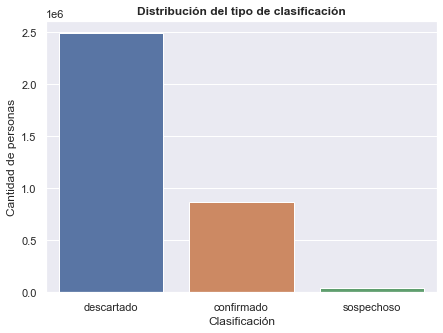

In [20]:
plt.figure(figsize = (7,5))
sns.set_theme(style="darkgrid", context = 'notebook')
sns.countplot(x = 'clasificacion', data = working_data)
plt.title('Distribución del tipo de clasificación',fontweight = 'bold')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de personas')
#Guardo el plot
plt.savefig('plots/Distribución del tipo de clasificación.jpg', dpi = 300, format = 'jpg')
plt.show()

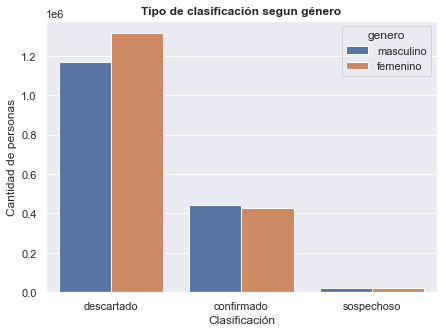

In [21]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'clasificacion',
              hue = 'genero',
              data = working_data)
plt.title('Tipo de clasificación segun género', fontweight = 'bold' )
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de personas')

plt.savefig('plots/clasificacion_segun_genero.jpg', dpi = 300, format = 'jpg')
plt.show()

__Ahora trabajemos solo con los positivos...__

In [22]:
#Distribucion del tipo de contagio
positivos['tipo_contagio'].value_counts()

Comunitario               391992
Contacto                   59832
En Investigación           37917
Trabajador de la Salud     15289
Importado                    356
Name: tipo_contagio, dtype: int64

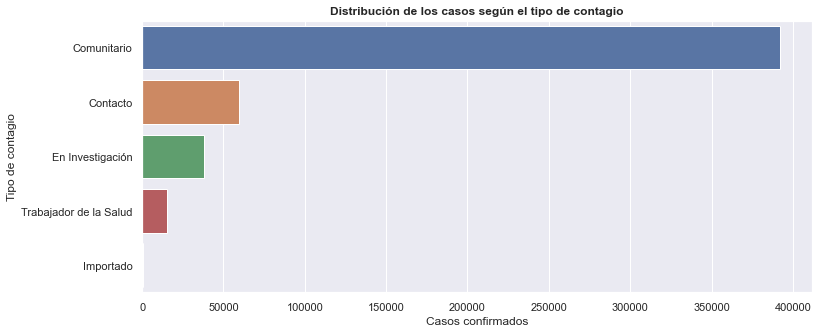

In [23]:
plt.figure(figsize = (12,5))
sns.set_theme(style="darkgrid")
sns.countplot(y = 'tipo_contagio',
              data = positivos,
              order = ['Comunitario', 'Contacto', 'En Investigación', 'Trabajador de la Salud', 'Importado'])
plt.title('Distribución de los casos según el tipo de contagio', fontweight = 'bold')
plt.xlabel('Casos confirmados')
#"plt.set_xticklabels ('100k', '200k', '300k', '400k, 500k', '600k', '700k')
plt.ylabel('Tipo de contagio')
plt.savefig('plots/distribucion_segun_contagio.jpg', dpi = 300, format = 'jpg')
plt.show()

__¿Hay diferencias según el género entre los casos positivos?__

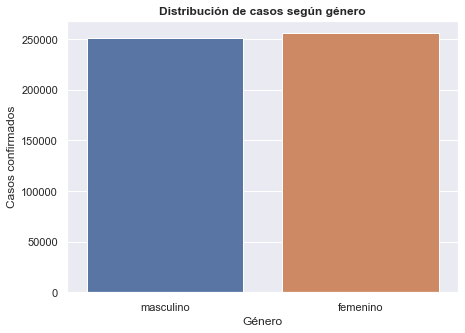

In [24]:
plt.figure(figsize = (7,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'genero', data = positivos)
plt.title('Distribución de casos según género',fontweight = 'bold')
plt.xlabel('Género')
plt.ylabel('Casos confirmados')
plt.savefig('plots/distribucion_casos_genero.jpg', dpi = 300, format = 'jpg')
plt.show()

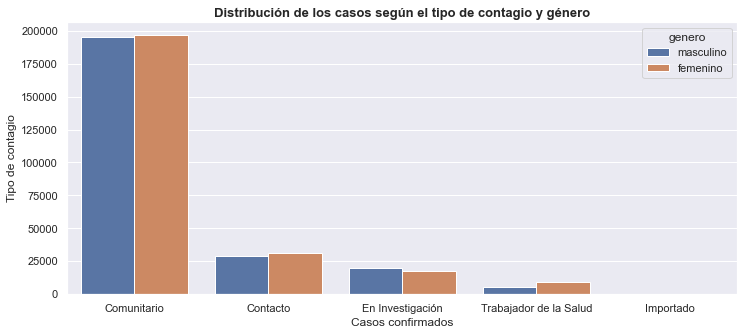

In [25]:
plt.figure(figsize = (12,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'tipo_contagio',
              hue = 'genero',
              data = positivos,
              order = ['Comunitario', 'Contacto', 'En Investigación', 'Trabajador de la Salud', 'Importado'])
plt.title('Distribución de los casos según el tipo de contagio y género', fontweight = 'bold', fontsize = 13)
plt.xlabel('Casos confirmados')
plt.ylabel('Tipo de contagio')
plt.savefig('plots/distribucion_casos_contagioygenero.jpg', dpi = 300, format = 'jpg')
plt.show()

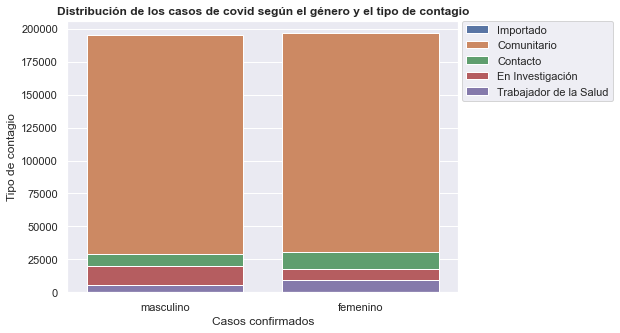

In [26]:
plt.figure(figsize = (7,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'genero',
              hue = 'tipo_contagio',
              data = positivos,
              dodge = False)
plt.title('Distribución de los casos de covid según el género y el tipo de contagio', fontweight = 'bold')
plt.xlabel('Casos confirmados')
plt.ylabel('Tipo de contagio')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.rcParams["figure.figsize"] = (7, 5)
plt.savefig('plots/distribucion_casos_generoycontagio.jpg', dpi = 300, format = 'jpg')
plt.show()

__¿Cuántos fallecidos hubo hasta la actualidad?__

In [27]:
working_data['fallecido'].value_counts()

si    18666
Name: fallecido, dtype: int64

__Cómo se distribuye la edad entre los positivos y fallecidos?__

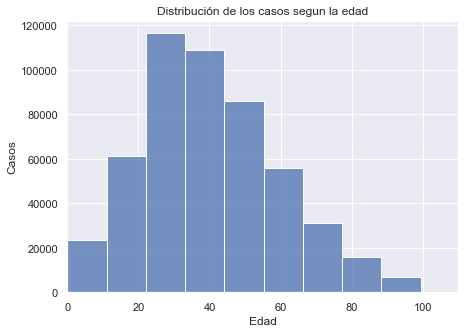

In [28]:
sns.histplot(x = 'edad', data = positivos, bins = 20)
plt.ylabel ('Casos')
plt.xlabel('Edad')
plt.xlim(0,110)
plt.rcParams["figure.figsize"] = (7, 5)
plt.title ('Distribución de los casos segun la edad')
plt.savefig('plots/edad_en_positivos.jpg', dpi = 300, format = 'jpg')
plt.show()

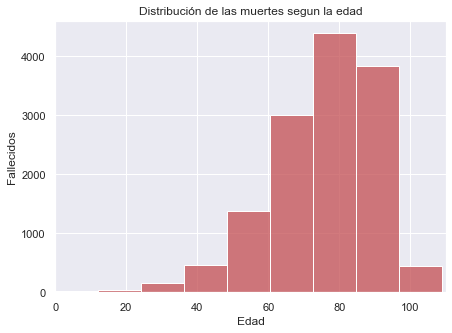

In [29]:
sns.histplot(x = 'edad', data = fallecidos, bins = 10, color = 'r')
plt.ylabel ('Fallecidos')
plt.xlabel('Edad')
plt.xlim(0,110)
plt.rcParams["figure.figsize"] = (7, 5)
plt.title('Distribución de las muertes segun la edad')
plt.savefig('plots/edad_en_fallecidos.jpg', dpi = 300, format = 'jpg')
plt.show()

### Ahora veamos solo los casos diarios

Creamos una nueva columna con que tenga el promedio de casos de los ultimos 7 días. Luego convertimos los date index en columnas y le cambiamos el nombre a 'fecha_clasificacion'

In [30]:
casos_diarios['7day_rolling_avg'] = casos_diarios.Casos.rolling(7).mean()
casos_diarios.reset_index(inplace=True)
casos_diarios = casos_diarios.rename(columns = {'index' :'fecha_clasificacion'})
casos_diarios

,fecha_clasificacion,Casos,7day_rolling_avg
0,2020-03-06,3,NaN
1,2020-03-07,1,NaN
2,2020-03-09,1,NaN
3,2020-03-10,1,NaN
4,2020-03-11,2,NaN
...,...,...,...
583,2021-10-12,208,126.285714
584,2021-10-13,176,126.857143
585,2021-10-14,223,140.571429
586,2021-10-15,160,150.857143


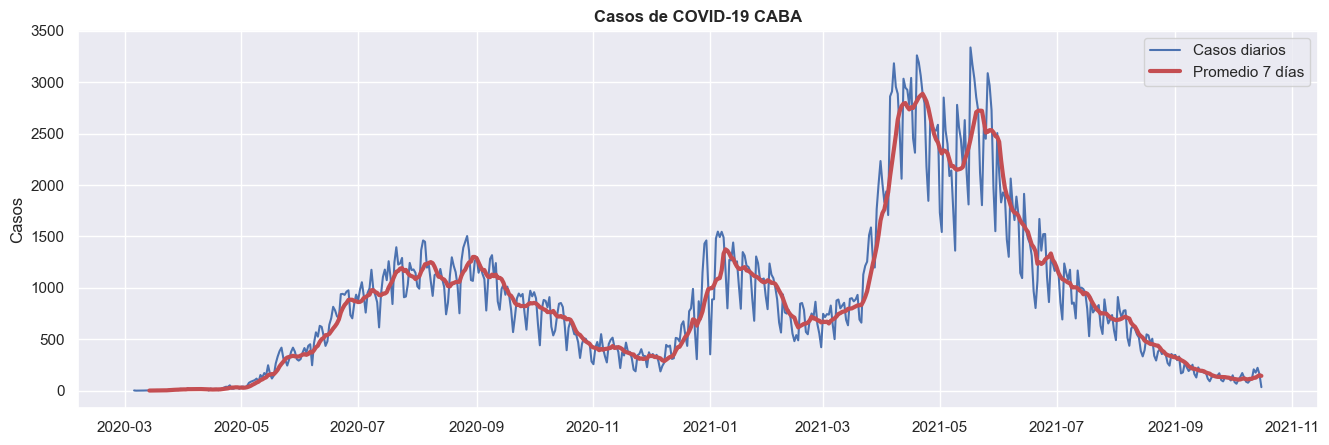

In [31]:
sns.set_theme(style="darkgrid", context = 'notebook')
plt.figure(figsize = (16,5), dpi = 100)
sns.lineplot(x = 'fecha_clasificacion',
             y = 'Casos',
             data = casos_diarios,
             label = 'Casos diarios',
             color = 'b',
             ci = None)
sns.lineplot(x = 'fecha_clasificacion',
             y = '7day_rolling_avg',
             data = casos_diarios,
             label = 'Promedio 7 días',
             linewidth = 3,
             color = 'r',
             ci = None)
plt.title('Casos de COVID-19 CABA', fontweight = 'bold')
plt.ylabel ('Casos')
plt.xlabel('')
plt.savefig('plots/casosdiarios_doblelineplot.jpg', dpi = 300, format = 'jpg')
plt.show()

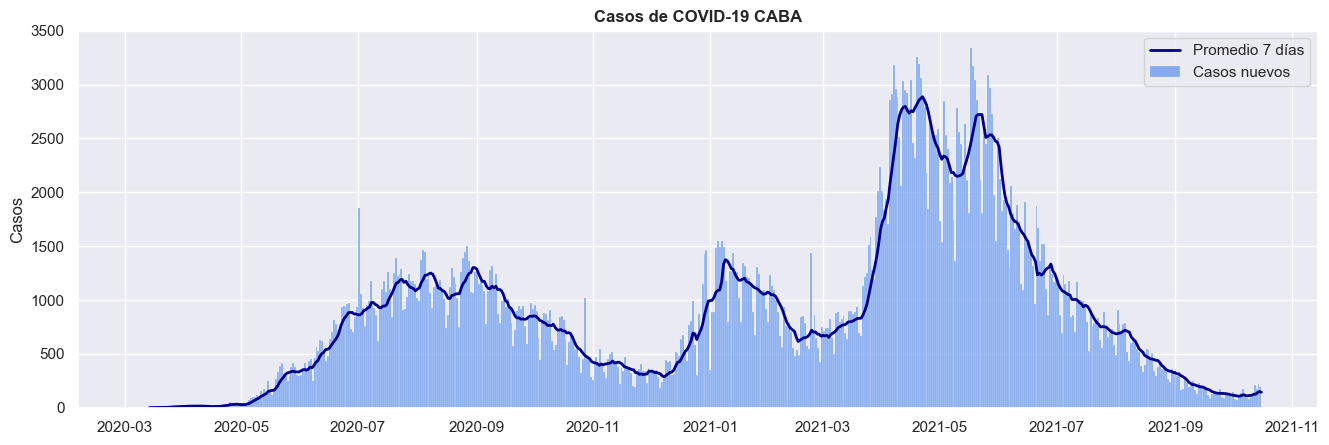

In [32]:
plt.figure(figsize = (16,5), dpi = 100)
sns.histplot(x = 'fecha_clasificacion',
             data = positivos, 
             bins = 584,
             label = 'Casos nuevos', 
             color = 'cornflowerblue')#588 porque len() de working data

sns.lineplot(x = 'fecha_clasificacion',
             y = '7day_rolling_avg',
             data = casos_diarios,
             label = 'Promedio 7 días',
             color = 'darkblue',
             linewidth = 2,
             ci = None)

plt.title('Casos de COVID-19 CABA', fontweight = 'bold')
plt.ylabel ('Casos')
plt.xlabel('')
plt.savefig('plots/casosdiarios_lineyhistplot.jpg', dpi = 300, format = 'jpg')
plt.show()

#### Hacemos lo mismo con FALLECIDOS DIARIOS

In [33]:
muertes_diarias['7_dias_promedio'] = muertes_diarias.Muertes.rolling(7).mean()
muertes_diarias.reset_index(inplace=True)
muertes_diarias = muertes_diarias.rename(columns = {'index' :'fecha_fallecimiento'})
muertes_diarias

,fecha_fallecimiento,Muertes,7_dias_promedio
0,2020-03-07,1,NaN
1,2020-03-09,1,NaN
2,2020-03-10,1,NaN
3,2020-03-15,1,NaN
4,2020-03-17,1,NaN
...,...,...,...
571,2021-10-10,2,2.000000
572,2021-10-11,3,2.000000
573,2021-10-13,2,2.000000
574,2021-10-14,4,2.285714


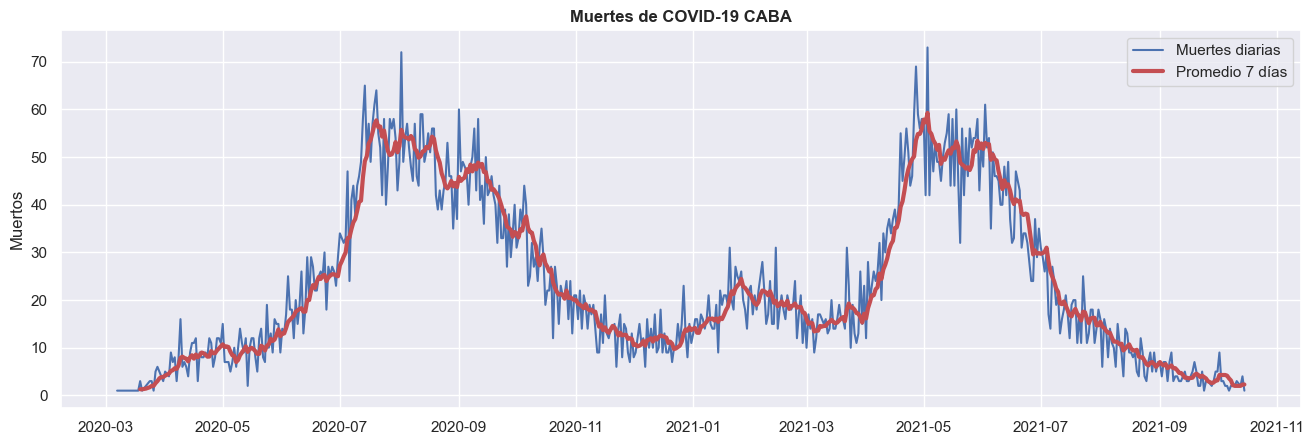

In [34]:
plt.figure(figsize = (16,5), dpi = 100)
sns.lineplot(x = 'fecha_fallecimiento',
             y = 'Muertes',
             data = muertes_diarias,
             label = 'Muertes diarias',
             color = 'b',
             ci = None)

sns.lineplot(x = 'fecha_fallecimiento',
             y = '7_dias_promedio',
             data = muertes_diarias,
             label = 'Promedio 7 días',
             linewidth = 3,
             color = 'r',
             ci = None)
plt.title('Muertes de COVID-19 CABA', fontweight = 'bold')
plt.ylabel ('Muertos')
plt.xlabel('')
plt.savefig('plots/muertesdiarias_doblelineplot.jpg', dpi = 300, format = 'jpg')
plt.show()

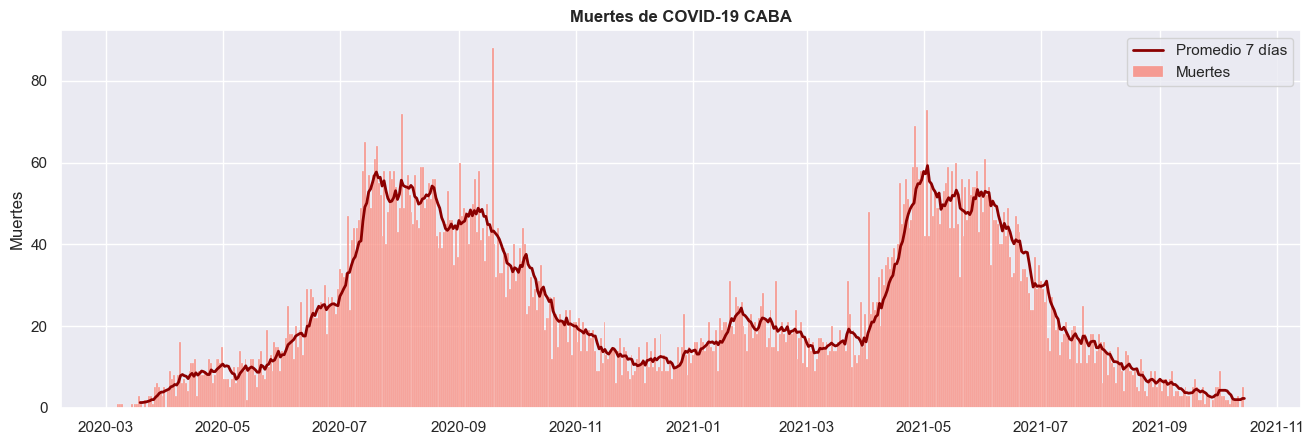

In [35]:
plt.figure(figsize = (16,5), dpi = 100)
sns.histplot(x = 'fecha_fallecimiento', data = fallecidos, bins = 584, label = 'Muertes', color = 'salmon') #588 porque len() de working data
sns.lineplot(x = 'fecha_fallecimiento', y = '7_dias_promedio', data = muertes_diarias, label = 'Promedio 7 días',color = 'darkred',linewidth = 2, ci = None )
plt.title('Muertes de COVID-19 CABA', fontweight = 'bold')
plt.ylabel ('Muertes')
plt.xlabel('')

plt.savefig('plots/muertesdiarias_lineyhistplot.jpg', dpi = 300, format = 'jpg')
plt.show()

In [36]:
muertes_diarias

,fecha_fallecimiento,Muertes,7_dias_promedio
0,2020-03-07,1,NaN
1,2020-03-09,1,NaN
2,2020-03-10,1,NaN
3,2020-03-15,1,NaN
4,2020-03-17,1,NaN
...,...,...,...
571,2021-10-10,2,2.000000
572,2021-10-11,3,2.000000
573,2021-10-13,2,2.000000
574,2021-10-14,4,2.285714


__Ahora unimos CASOS DIARIOS y MUERTES DIARIAS en un mismo gráfico__

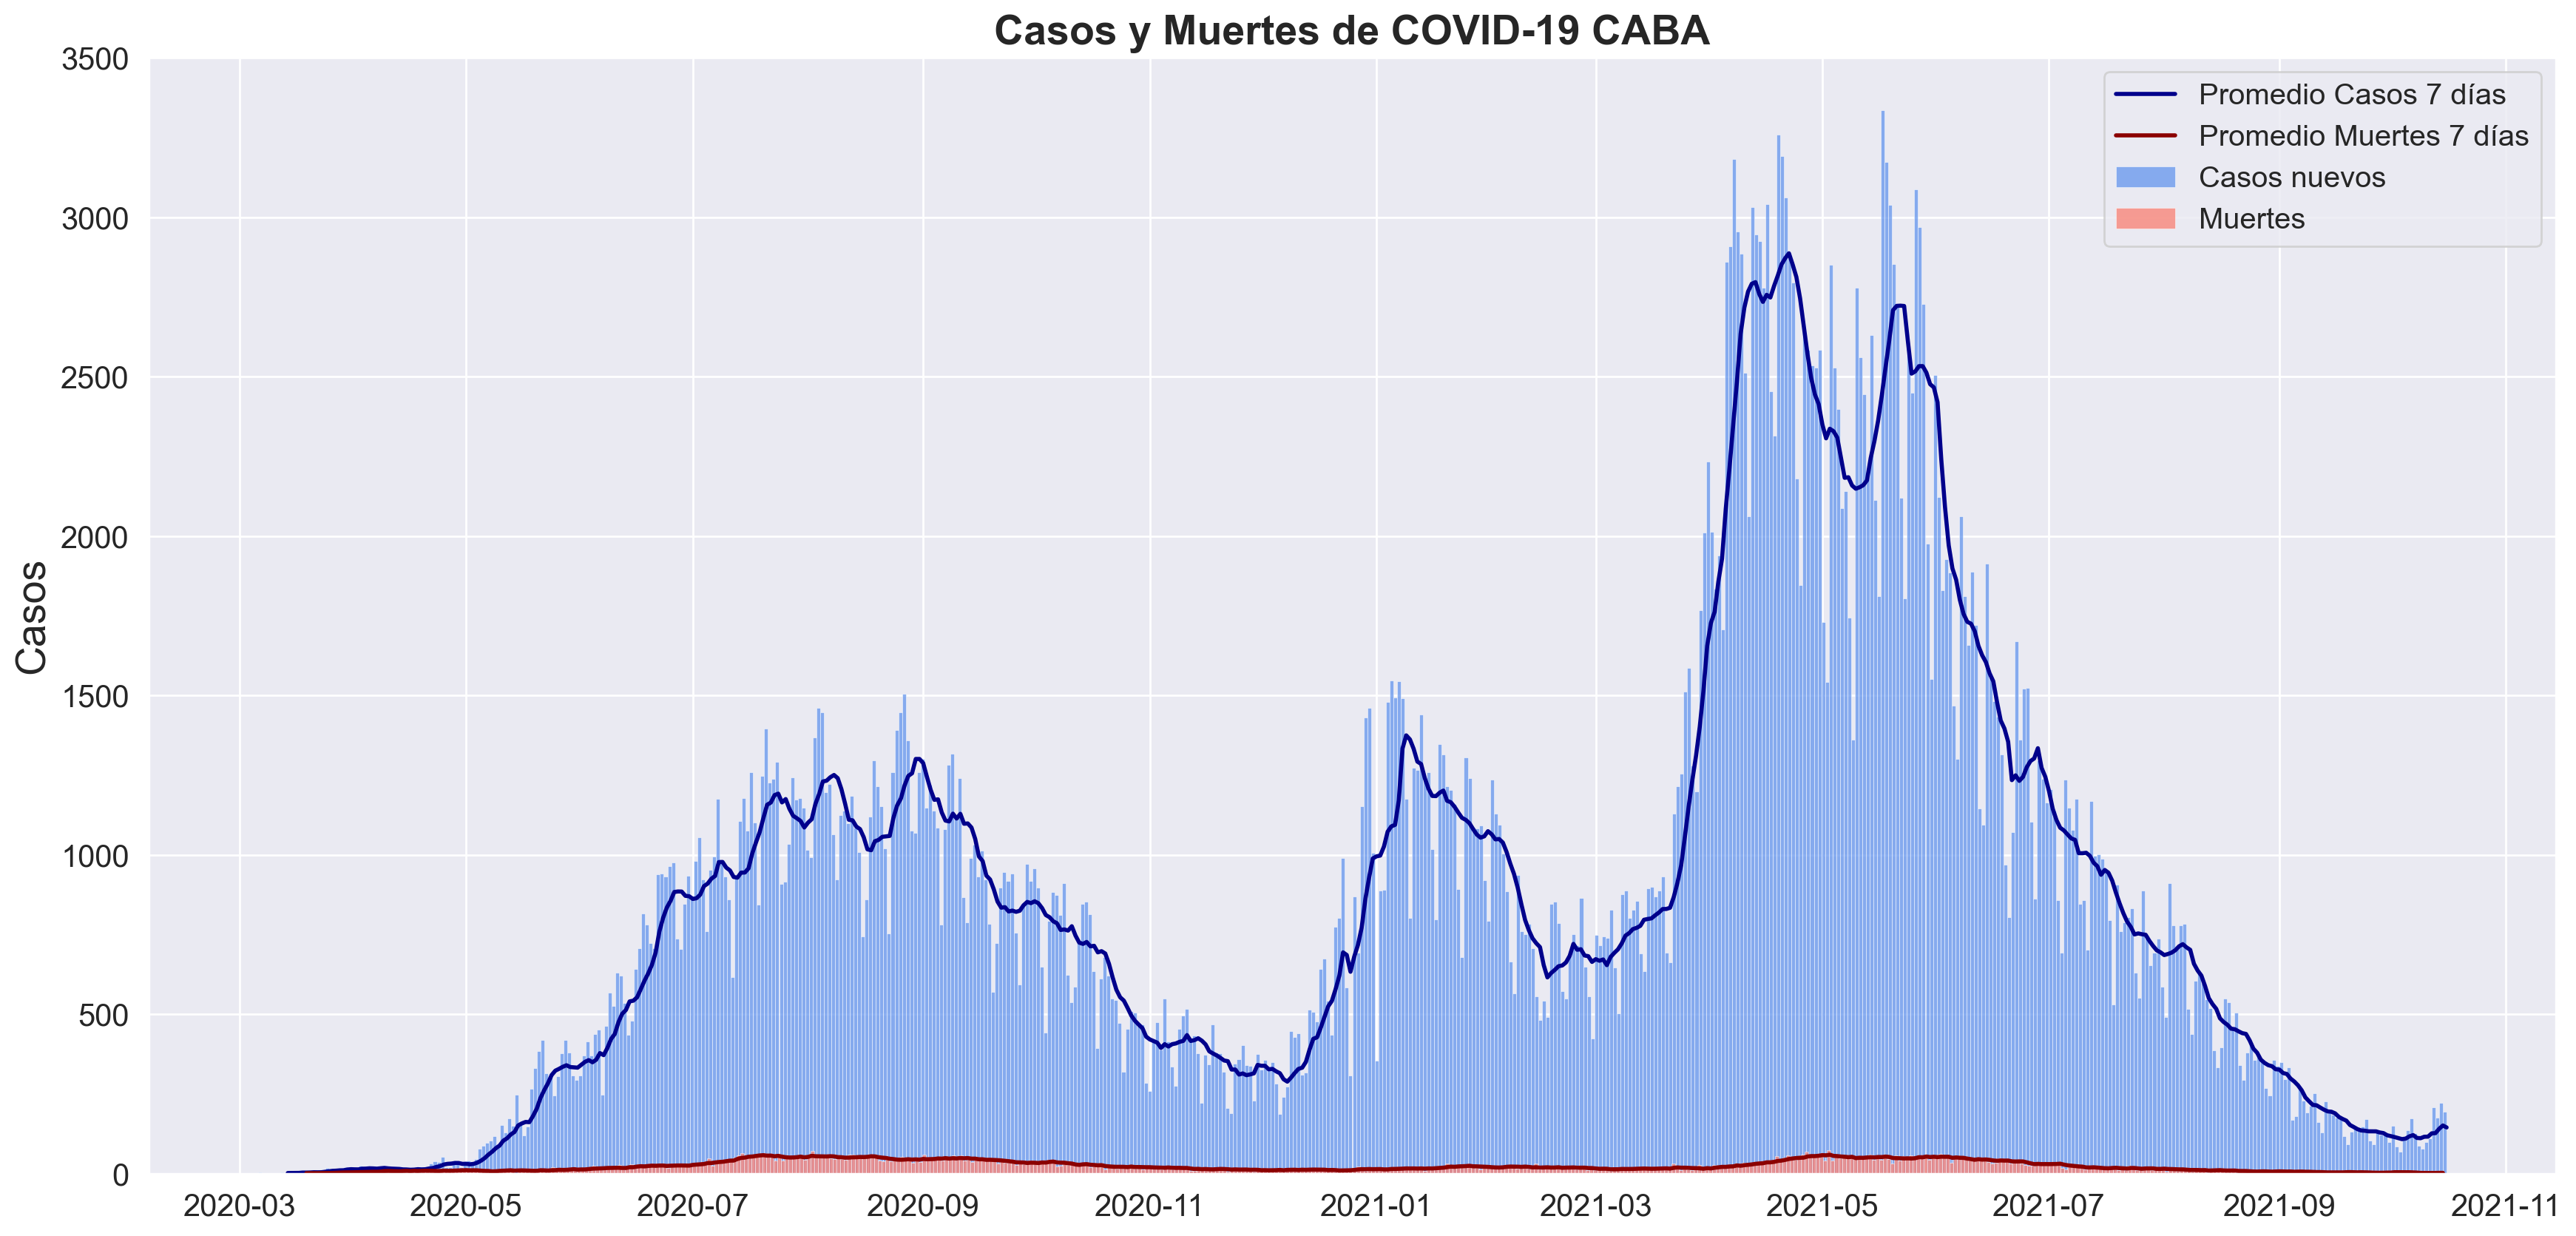

In [37]:
#Plot casos diarios
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.figure(figsize = (21,10), dpi = 200)
sns.histplot(x = 'fecha_clasificacion',
             data = positivos,
             bins = 588,
             label = 'Casos nuevos',
             color = 'cornflowerblue') #588 porque len() de working data

#PLot promedio de casos 7 dias
sns.lineplot(x = 'fecha_clasificacion',
             y = '7day_rolling_avg',
             data = casos_diarios,
             label = 'Promedio Casos 7 días',
             color = 'darkblue',
             linewidth = 2,
             ci = None)

#Plot Muertes diarias
sns.histplot(x = 'fecha_fallecimiento',
             data = fallecidos,
             bins = 588,
             label = 'Muertes',
             color = 'salmon') #588 porque len() de working data

#Plot promedio de muertes 7 dias
sns.lineplot(x = 'fecha_fallecimiento',
             y = '7_dias_promedio',
             data = muertes_diarias,
             label = 'Promedio Muertes 7 días',
             color = 'darkred',
             linewidth = 2,
             ci = None )
plt.title('Casos y Muertes de COVID-19 CABA', fontweight = 'bold', fontsize = 20)
plt.ylabel ('Casos', fontsize = 20)
plt.xlabel('')
plt.legend(fontsize = 'large')
plt.savefig('plots/casosymuertesdiarias.jpg', dpi = 300, format = 'jpg')
plt.show()